In [2]:
import pandas as pd

In [2]:
#1)IMPORTAR EL ARCHIVO
#Leo el archivo con el delimitador apropiado en un DataFrame de pandas
df = pd.read_csv('Call_Center_1999_DataSet.csv', delimiter=';')

C:\Users\nahue\AppData\Local\Temp\ipykernel_19212\1179263909.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet.csv', delimiter=';')


In [3]:
#2)EXPLORAR LOS PRIMEROS DATOS
#Reviso la estructura del dataset, el número de filas y columnas, y los primeros registros.
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [4]:
#3)REVISAR VALORES FALTANTES Y TIPOS DE DATOS
#Verifico si hay datos faltantes y veo los tipos de datos actuales en cada columna.
df.info()
#Esto me ayudará a entender las columnas y a identificar problemas como tipos de datos incorrectos o valores nulos.
#df.isnull().sum()
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [5]:
#4) CONVERSION DE COLUMNAS DE FECHA Y HORA
#Convierto columnas que representan fechas y horas en formatos de tiempo.

#De esta manera, todas las columnas con formato de tiempo, me quedan con fecha y hora. 

df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df["vru_entry"] = pd.to_datetime(df["vru_entry"], format="%H:%M:%S", errors='coerce')
df["vru_exit"] = pd.to_datetime(df["vru_exit"], format="%H:%M:%S", errors='coerce')
df["q_start"] = pd.to_datetime(df["q_start"], format="%H:%M:%S", errors='coerce')
df["q_exit"] = pd.to_datetime(df["q_exit"], format="%H:%M:%S", errors='coerce')
df["ser_start"] = pd.to_datetime(df["ser_start"], format="%H:%M:%S", errors='coerce')
df["ser_exit"] = pd.to_datetime(df["ser_exit"], format="%H:%M:%S", errors='coerce')
#Nota: errors='coerce' convertirá a NaT (Not a Time) los valores que no puedan convertirse, evitando errores en caso 
# de datos inconsistentes.

In [6]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,1900-01-01 00:00:31,1900-01-01 00:00:36,5,1900-01-01 00:00:36,1900-01-01 00:03:09,153,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,1900-01-01 00:34:12,1900-01-01 00:34:23,11,1900-01-01 00:00:00,1900-01-01 00:00:00,0,HANG,1900-01-01 00:00:00,1900-01-01 00:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,1900-01-01 06:55:20,1900-01-01 06:55:26,6,1900-01-01 06:55:26,1900-01-01 06:55:43,17,AGENT,1900-01-01 06:55:43,1900-01-01 06:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,1900-01-01 07:41:16,1900-01-01 07:41:26,10,1900-01-01 00:00:00,1900-01-01 00:00:00,0,AGENT,1900-01-01 07:41:25,1900-01-01 07:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,1900-01-01 08:03:14,1900-01-01 08:03:24,10,1900-01-01 00:00:00,1900-01-01 00:00:00,0,AGENT,1900-01-01 08:03:23,1900-01-01 08:05:10,107,MICHAL,0


In [7]:
#Para quedarme solamente con la parte de la hora
df["vru_entry"] = df["vru_entry"].dt.time
df["vru_exit"] = df["vru_exit"].dt.time
df["q_start"] = df["q_start"].dt.time
df["q_exit"] = df["q_exit"].dt.time
df["ser_start"] = df["ser_start"].dt.time
df["ser_exit"] = df["ser_exit"].dt.time
#Al usar .dt.time, conservamos únicamente la información de la hora y descartamos la fecha por completo.

In [8]:
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,00:00:31,00:00:36,5,00:00:36,00:03:09,153,HANG,00:00:00,00:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,00:34:12,00:34:23,11,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,06:55:20,06:55:26,6,06:55:26,06:55:43,17,AGENT,06:55:43,06:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,07:41:16,07:41:26,10,00:00:00,00:00:00,0,AGENT,07:41:25,07:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,08:03:14,08:03:24,10,00:00:00,00:00:00,0,AGENT,08:03:23,08:05:10,107,MICHAL,0


In [9]:
#6) REVISAR Y MANEJAR VALORES ATÍPICOS
#Identifico valores extremos o inconsistentes en variables como priority, vru_time, q_time, y ser_time.

# Identifico valores únicos en prioridad para asegurarme de que no haya mas que los descritos en el word
print(df["priority"].unique())

[2 0 1]


In [10]:
# Descripción estadística de las columnas de tiempo
print(df[["vru_time", "q_time", "ser_time"]].describe())

#Observo si hay valores negativos, excesivamente altos, o fuera de rango para definir reglas para tratarlos

            vru_time         q_time       ser_time
count  444448.000000  444448.000000  444448.000000
mean       10.286081      59.004304     152.561776
std        34.942136     119.470328     282.372761
min      -362.000000       0.000000       0.000000
25%         6.000000       0.000000      12.000000
50%         8.000000      16.000000      84.000000
75%        10.000000      79.000000     185.000000
max      4832.000000   28693.000000   61437.000000


In [11]:
#Corrección de los valores negativos en vru_time. Los ingresos de hora de entrada y salida estan al revés.
# Identificar registros con vru_time negativo
neg_vru_time_mask = df["vru_time"] < 0

# Intercambiar valores de vru_entry y vru_exit donde vru_time es negativo
df.loc[neg_vru_time_mask, ["vru_entry", "vru_exit"]] = df.loc[neg_vru_time_mask, ["vru_exit", "vru_entry"]].values

# Recalcular vru_time para corregir los valores negativos
df["vru_time"] = (pd.to_datetime(df["vru_exit"], format="%H:%M:%S") - pd.to_datetime(df["vru_entry"], format="%H:%M:%S")).dt.total_seconds()


In [12]:
print(df[["vru_time", "q_time", "ser_time"]].describe())

            vru_time         q_time       ser_time
count  444448.000000  444448.000000  444448.000000
mean       10.396357      59.004304     152.561776
std        34.909485     119.470328     282.372761
min         0.000000       0.000000       0.000000
25%         6.000000       0.000000      12.000000
50%         8.000000      16.000000      84.000000
75%        10.000000      79.000000     185.000000
max      4832.000000   28693.000000   61437.000000


In [3]:
#Visualizo los outliers (max) para definir una estrategia a seguir con los mismos
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

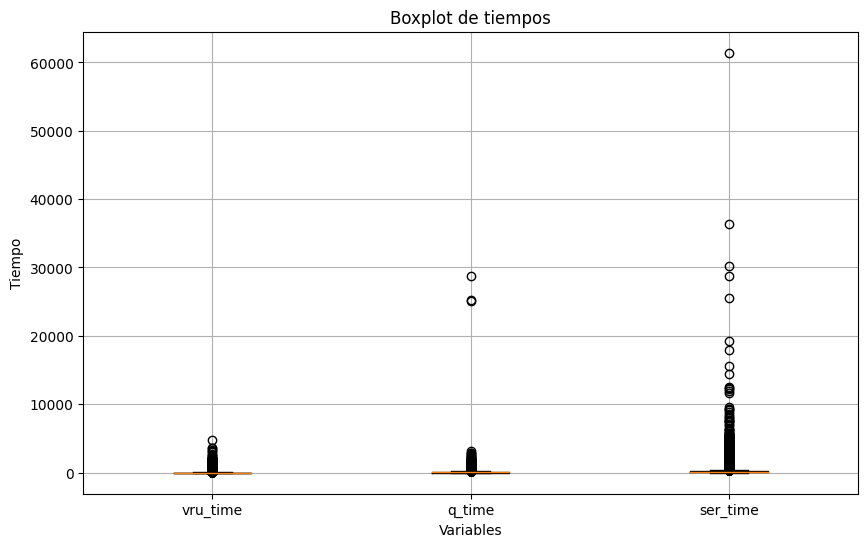

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['vru_time'], df['q_time'], df['ser_time']], labels=['vru_time', 'q_time', 'ser_time'])
plt.title('Boxplot de tiempos')
plt.ylabel('Tiempo')
plt.xlabel('Variables')
plt.grid(True)
plt.show()

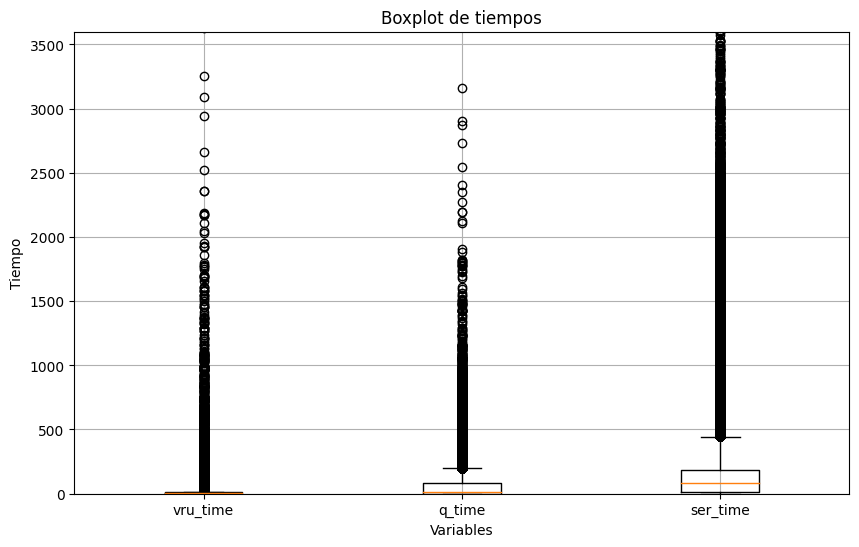

In [15]:
#Achico el rango de tiempo a una hora.
plt.figure(figsize=(10, 6)) 
plt.boxplot([df['vru_time'], df['q_time'], df['ser_time']], labels=['vru_time', 'q_time', 'ser_time']) 
plt.ylim(0, 3600) # Establezco el límite del eje Y 
plt.title('Boxplot de tiempos') 
plt.ylabel('Tiempo') 
plt.xlabel('Variables') 
plt.grid(True)

In [16]:
#Habiendo visto el gráfico decido filtrar algunos outliers mas. Considero raro tiempos de espera mayores a
#10 minutos (600 segundos) y tiempos de servicio mayores a 30 minutos (1800 segundos)

df = df[(df["ser_time"] <= 1800) & (df["q_time"] <= 600) & (df["vru_time"] <= 600)]


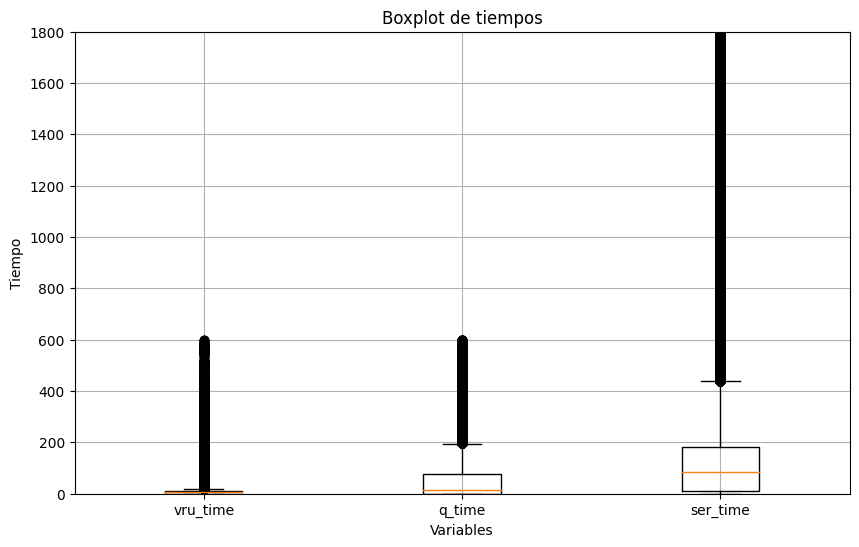

In [17]:
#Visualizo cómo quedó el filtrado.
plt.figure(figsize=(10, 6)) 
plt.boxplot([df['vru_time'], df['q_time'], df['ser_time']], labels=['vru_time', 'q_time', 'ser_time']) 
plt.ylim(0, 1800) 
plt.title('Boxplot de tiempos') 
plt.ylabel('Tiempo') 
plt.xlabel('Variables') 
plt.grid(True)

In [18]:
print(df[["vru_time", "q_time", "ser_time"]].describe())

           vru_time         q_time       ser_time
count  441756.00000  441756.000000  441756.000000
mean        9.69614      56.805363     145.542476
std        16.91417      88.897732     201.958412
min         0.00000       0.000000       0.000000
25%         6.00000       0.000000      12.000000
50%         8.00000      15.000000      84.000000
75%        10.00000      78.000000     183.000000
max       600.00000     600.000000    1800.000000


In [ ]:
#7) REVISAR SI TODAS LAS COLUMNAS TIENEN RELACION O SON NECESARIAS
# Veo los registros de 'startdate', 'date' y 'vru_entry' para encontrar alguna relación de la columna startdate
#con el resto de las columnas.
print(df[["startdate", "date", "vru_entry"]])


        startdate       date vru_entry
0               0 1999-01-01  00:00:31
1               0 1999-01-01  00:34:12
2               0 1999-01-01  06:55:20
3               0 1999-01-01  07:41:16
4               0 1999-01-01  08:03:14
...           ...        ...       ...
444443        334 1999-12-31  13:46:51
444444        334 1999-12-31  13:58:31
444445        334 1999-12-31  17:10:51
444446        334 1999-12-31  18:30:19
444447        334 1999-12-31  22:23:35

[441756 rows x 3 columns]


In [ ]:
#Encuentro que los numeros en "startdate" corresponden a la sumatoria de los días del mes, es decir: 
#Enero = 0, 
#Febrero = 31 (pasaron 31 días y cambió de mes), 
#Marzo = 59 (31 días de Enero + 28 días de Febrero)...
#Diciembre = 334; que si le sumamos los 31 días del mismo dan los 365 días del año.
'''Teniendo la columna ´Fecha´ para realizar filtraciones, la confusión que puede surgir en un año bisiesto, la relación de 
los números con el mes no es la mas adecuada a mi entender, y que es la columna 18 de las 17 descriptas en el word decido
borrarla.''' 
df = df.drop(df.columns[17], axis=1)

In [40]:
df.to_csv('Call_Center_1999_DataSet_Limpio.csv', index=False)

In [4]:
dfl = pd.read_csv('Call_Center_1999_DataSet_Limpio.csv', delimiter=',')

C:\Users\nahue\AppData\Local\Temp\ipykernel_17924\2598752475.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dfl = pd.read_csv('Call_Center_1999_DataSet_Limpio.csv', delimiter=',')


In [5]:
dfl.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server
0,AA0101,33116,9664491.0,2,PS,1999-01-01,00:00:31,00:00:36,5.0,00:00:36,00:03:09,153,HANG,00:00:00,00:00:00,0,NO_SERVER
1,AA0101,33117,0.0,0,PS,1999-01-01,00:34:12,00:34:23,11.0,00:00:00,00:00:00,0,HANG,00:00:00,00:00:00,0,NO_SERVER
2,AA0101,33118,27997683.0,2,PS,1999-01-01,06:55:20,06:55:26,6.0,06:55:26,06:55:43,17,AGENT,06:55:43,06:56:37,54,MICHAL
3,AA0101,33119,0.0,0,PS,1999-01-01,07:41:16,07:41:26,10.0,00:00:00,00:00:00,0,AGENT,07:41:25,07:44:53,208,BASCH
4,AA0101,33120,0.0,0,PS,1999-01-01,08:03:14,08:03:24,10.0,00:00:00,00:00:00,0,AGENT,08:03:23,08:05:10,107,MICHAL


In [ ]:
'''Defino los KPIs para medir los objetivos:

Nivel de Servicio (SLA) para Clientes Prioritarios:

Tiempo promedio de espera (q_time) y porcentaje de llamadas atendidas dentro del tiempo de espera establecido 
(por ejemplo, 1.5 minutos para clientes de alta prioridad).
Tiempo promedio en el sistema (vru_time + q_time + ser_time).

Eficiencia Operativa:

Tasa de abandono en cola (outcome = "HANG").
Tiempo de resolución promedio (ser_time).
Porcentaje de ocupación de agentes (tiempo en servicio sobre el tiempo total).

Satisfacción del Cliente:

Tiempo de atención para clientes de alta prioridad vs. regular.
Distribución del resultado de llamadas (atendidas, colgadas, y "phantom")'''

In [6]:
#Pregunta 1 - ¿Cuál es el nivel de servicio para los clientes Prioritarios?

# Filtrar clientes de alta prioridad
dfl_priority = dfl[dfl["priority"] == 2]
# Tiempo promedio de espera en cola (q_time)
promedio_espera = dfl_priority["q_time"].mean()
promedio_espera_redondeado = round(promedio_espera)
print(f"Tiempo promedio de espera en cola para clientes prioritarios: {promedio_espera_redondeado} segundos")
# Calcular porcentaje de llamadas con espera <= 90 segundos (SLA)
porcentaje_sla = (dfl_priority["q_time"] <= 90).mean() * 100
print(f"Porcentaje de llamadas dentro del SLA (90 segundos): {porcentaje_sla:.2f}%")


Tiempo promedio de espera en cola para clientes prioritarios: 85 segundos
Porcentaje de llamadas dentro del SLA (90 segundos): 67.22%


In [8]:
# Tiempo total en el sistema (vru_time + q_time + ser_time)
dfl_priority.loc[:, "total_time"] = dfl_priority["vru_time"] + dfl_priority["q_time"] + dfl_priority["ser_time"]
tiempo_total_promedio_en_sistema = dfl_priority["total_time"].mean()
tiempo_total_promedio_en_sistema_redondeado = round(tiempo_total_promedio_en_sistema)
print(f"Tiempo promedio en el sistema para clientes prioritarios: {tiempo_total_promedio_en_sistema_redondeado} segundos")

#.loc[:, "total_time"] se asegura de que estás asignando la nueva columna 'total_time' directamente en dfl_priority, 
#sin crear una copia temporal.

Tiempo promedio en el sistema para clientes prioritarios: 264 segundos


In [9]:
#Tasa de abandono
tasa_abandono_prioritarios = (dfl_priority["outcome"] == "HANG").mean() * 100
print(f"Tasa de abandono - Clientes prioritarios: {tasa_abandono_prioritarios:.2f}%")

Tasa de abandono - Clientes prioritarios: 14.24%


In [10]:
#Tiempo de resolución promedio (ser_time)
tiempo_resolucion_promedio = dfl_priority["ser_time"].mean()
print(f'El tiempo de resolucion promedio es {tiempo_resolucion_promedio:.2f} segundos')

El tiempo de resolucion promedio es 172.98 segundos


In [11]:
#Porcentaje de ocupación de agentes (tiempo en servicio a prioritarios sobre el tiempo total)

# 1. Tiempo total en servicio de agentes para clientes prioritarios
total_ser_time_prioritarios = dfl_priority["ser_time"].sum()

# 2. Calcular tiempo total disponible de los agentes (en segundos)
# Sabiendo del word que el horario de atencion es de domingo a jueves (17 horas/día) y viernes a sábado (7 horas)
horas_semanales = (5 * 17 + 2 * 7)  # Total de horas por semana
segundos_semanales = horas_semanales * 3600
numero_agentes = 8
tiempo_disponible_total = segundos_semanales * numero_agentes * 52 #(cantidad de semanas en el año)

# 3. Porcentaje de ocupación
porcentaje_ocupacion = (total_ser_time_prioritarios / tiempo_disponible_total) * 100
print(f"Porcentaje de ocupación de agentes para clientes prioritarios: {porcentaje_ocupacion:.2f}%")


Porcentaje de ocupación de agentes para clientes prioritarios: 15.96%


In [18]:
#Pregunta 2 - ¿Damos un mejor servicio que a los clientes normales?

# Filtrar clientes normales
dfl_normales = dfl[(dfl["priority"] == 0) | (dfl["priority"] == 1)]

# Tiempo promedio de espera en cola (q_time)
promedio_espera_normales = dfl_normales["q_time"].mean()
promedio_espera_redondeado_normales = round(promedio_espera_normales)
print(f"Tiempo promedio de espera en cola para clientes normales: {promedio_espera_redondeado_normales} segundos")

# Tiempo total en el sistema (vru_time + q_time + ser_time)
dfl_normales.loc[:, "total_time_n"] = dfl_normales["vru_time"] + dfl_normales["q_time"] + dfl_normales["ser_time"]
tiempo_total_promedio_en_sistema_normales = dfl_normales["total_time_n"].mean()
tiempo_total_promedio_en_sistema_normales_redondeado = round(tiempo_total_promedio_en_sistema_normales)
print(f"Tiempo promedio en el sistema para clientes normales: {tiempo_total_promedio_en_sistema_normales_redondeado} segundos")

#Tasa de abandono
tasa_abandono_normales = (dfl_normales["outcome"] == "HANG").mean() * 100
print(f"Tasa de abandono - Clientes normales: {tasa_abandono_normales:.2f}%")

#Tiempo de resolución promedio (ser_time)
tiempo_resolucion_promedio_normales = dfl_normales["ser_time"].mean()
print(f'El tiempo de resolucion promedio para clientes normales es {tiempo_resolucion_promedio_normales:.2f} segundos')

Tiempo promedio de espera en cola para clientes normales: 44 segundos
Tiempo promedio en el sistema para clientes normales: 189 segundos
Tasa de abandono - Clientes normales: 22.18%
El tiempo de resolucion promedio para clientes normales es 133.24 segundos


C:\Users\nahue\AppData\Local\Temp\ipykernel_17924\611609915.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl_normales.loc[:, "total_time_n"] = dfl_normales["vru_time"] + dfl_normales["q_time"] + dfl_normales["ser_time"]


In [ ]:
#Porcentaje de ocupación de agentes (tiempo en servicio a normales sobre el tiempo total)

# 1. Tiempo total en servicio de agentes para clientes normales
total_ser_time_normales = dfl_normales["ser_time"].sum()

# 2. Calcular tiempo total disponible de los agentes (en segundos)
# Sabiendo del word que el horario de atencion es de domingo a jueves (17 horas/día) y viernes a sábado (7 horas)
horas_semanales = (5 * 17 + 2 * 7)  # Total de horas por semana
segundos_semanales = horas_semanales * 3600
numero_agentes = 8
tiempo_disponible_total = segundos_semanales * numero_agentes * 52 #(52 = cantidad de semanas en el año)

# 3. Porcentaje de ocupación
porcentaje_ocupacion_normales = (total_ser_time_normales / tiempo_disponible_total) * 100
print(f"Porcentaje de ocupación de agentes para clientes normales: {porcentaje_ocupacion_normales:.2f}%")

Porcentaje de ocupación de agentes para clientes normales: 27.41%


In [16]:

# Diccionario con los resultados de los KPIs para cada grupo de clientes
kpi_data = {
    "KPI": [
        "Tiempo promedio de espera en cola",
        "Tiempo promedio en el sistema",
        "Tasa de abandono",
        "Tiempo de resolución promedio",
        "Porcentaje de ocupación de agentes"
    ],
    "Clientes Normales": [
        promedio_espera_normales,
        tiempo_total_promedio_en_sistema_normales,
        tasa_abandono_normales,
        tiempo_resolucion_promedio_normales,
        porcentaje_ocupacion_normales
    ],
    "Clientes Prioritarios": [
        promedio_espera,
        tiempo_total_promedio_en_sistema,
        tasa_abandono_prioritarios,
        tiempo_resolucion_promedio,
        porcentaje_ocupacion
    ]
}

# Convertir a DataFrame para facilitar la visualización
kpi_dfl = pd.DataFrame(kpi_data)
kpi_dfl


,KPI,Clientes Normales,Clientes Prioritarios
0,Tiempo promedio de espera en cola,44.184593,84.953128
1,Tiempo promedio en el sistema,188.907187,263.645344
2,Tasa de abandono,22.177632,14.242989
3,Tiempo de resolución promedio,133.239966,172.980432
4,Porcentaje de ocupación de agentes,27.409730,15.955454


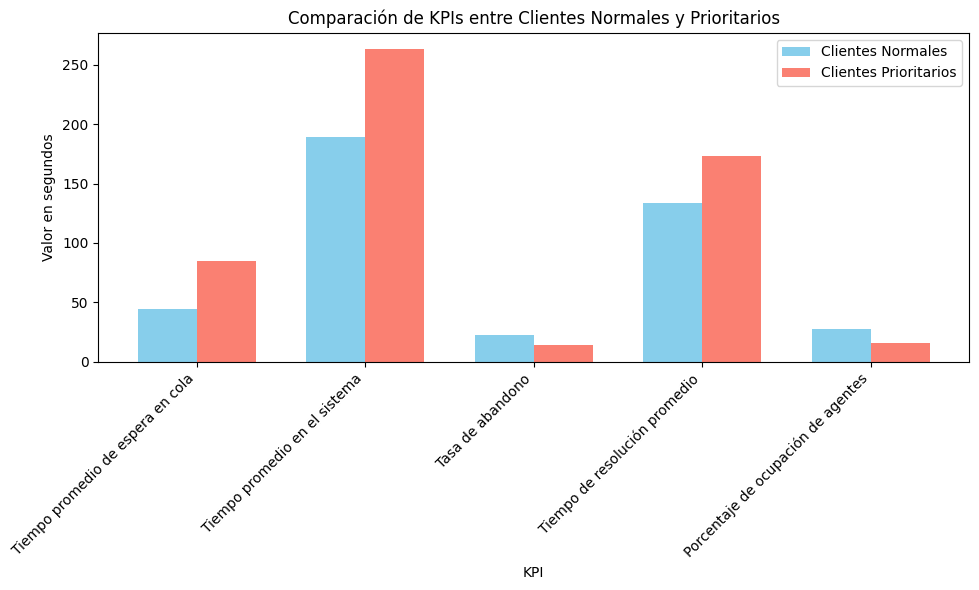

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear gráfico de barras agrupadas
bar_width = 0.35  # Ancho de las barras
x = range(len(kpi_dfl))  # Posiciones para los grupos de barras

# Graficar cada grupo de clientes
plt.bar(x, kpi_dfl["Clientes Normales"], width=bar_width, label="Clientes Normales", color="skyblue")
plt.bar([p + bar_width for p in x], kpi_dfl["Clientes Prioritarios"], width=bar_width, label="Clientes Prioritarios", color="salmon")

# Configuración del gráfico
plt.xlabel("KPI")
plt.ylabel("Valor en segundos")
plt.title("Comparación de KPIs entre Clientes Normales y Prioritarios")
plt.xticks([p + bar_width / 2 for p in x], kpi_dfl["KPI"], rotation=45, ha="right")
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

'''x = range(len(kpi_df))
Propósito: Crear una lista de posiciones (números enteros) para ubicar las barras de cada KPI en el eje X.
Explicación: len(kpi_df) devuelve el número de KPIs, es decir, el número de categorías que estamos comparando.
Ejemplo: Si tienes 5 KPIs, entonces range(len(kpi_df)) generará [0, 1, 2, 3, 4], lo cual indica las posiciones iniciales en el eje X para las 
barras de cada KPI.

[p + bar_width for p in x]
Propósito: Desplazar las posiciones de las barras de "Clientes Prioritarios" para que aparezcan al lado de las barras de "Clientes Normales".
Explicación: bar_width representa el ancho de cada barra (por ejemplo, 0.35). Al sumar bar_width a cada posición en x, estás desplazando 
las posiciones de las barras del segundo grupo (Clientes Prioritarios) a la derecha.

Ejemplo: Supón que x = [0, 1, 2, 3, 4] y bar_width = 0.35. Entonces [p + bar_width for p in x] se convertirá en [0.35, 1.35, 2.35, 3.35, 4.35], 
ubicando las barras de "Clientes Prioritarios" a la derecha de las de "Clientes Normales".'''

In [ ]:
#CONCLUSIÓN HASTA DONDE LLEGUÉ:
#Los clientes prioritarios, no tienen nada de prioritarios, al contrario.